In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
from valda.valuation import DataValuation

train_size = 1000
train_start = 0
train_size_batch = 200
dev_size = 200
test_size = 300
np.random.seed(0)
torch.manual_seed(0)

# Load data
X_train, y_train_clean, X_dev, y_dev, X_test, y_test = load_data(train_size, dev_size, test_size)
y_train, flip_indices = flip_labels(y_train_clean, flip_fraction=0.3)

# Create a batch of training data
X_train_batch = X_train[train_start:train_start+train_size_batch]
y_train_batch = y_train[train_start:train_start+train_size_batch]

# Define a DataValuation instance
dv = DataValuation(X_train_batch, y_train_batch, X_dev, y_dev)

Run with the default setting:
1. Logistic regression as the classifier
2. Prediction accuracy as the value measurement

In [ ]:
start_time = time.time()
vals_loo = dv.estimate(method="loo")
end_time = time.time()
time_loo = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_loo))

In [4]:
start_time = time.time()
vals_tmc = dv.estimate(method="tmc-shapley")
end_time = time.time()
time_tmc = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_tmc))

100%|██████████| 500/500 [03:50<00:00,  2.17it/s]

Time elapsed: 230.94 seconds


In [5]:
start_time = time.time()
vals_beta = dv.estimate(method="beta-shapley")
end_time = time.time()
time_beta = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_beta))

100%|██████████| 50/50 [39:48<00:00, 47.77s/it]

Time elapsed: 2388.58 seconds


In [6]:
start_time = time.time()
vals_cs = dv.estimate(method="cs-shapley")
end_time = time.time()
time_cs = end_time - start_time
print("Time elapsed: {:.2f} seconds".format(time_cs))

The number of training data with label 0 is 22
Labels on the other side: [1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:36<00:00,  5.16it/s]


score = 0.04
The number of training data with label 1 is 25
Labels on the other side: [0, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:39<00:00,  5.05it/s]


score = 0.14
The number of training data with label 2 is 22
Labels on the other side: [0, 1, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:25<00:00,  5.83it/s]


score = 0.04
The number of training data with label 3 is 17
Labels on the other side: [0, 1, 2, 4, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:16<00:00,  6.57it/s]


score = 0.02
The number of training data with label 4 is 19
Labels on the other side: [0, 1, 2, 3, 5, 6, 7, 8, 9]


100%|██████████| 500/500 [01:33<00:00,  5.36it/s]


score = 0.08
The number of training data with label 5 is 17
Labels on the other side: [0, 1, 2, 3, 4, 6, 7, 8, 9]


100%|██████████| 500/500 [01:22<00:00,  6.09it/s]


score = 0.02
The number of training data with label 6 is 24
Labels on the other side: [0, 1, 2, 3, 4, 5, 7, 8, 9]


100%|██████████| 500/500 [01:16<00:00,  6.54it/s]


score = 0.04
The number of training data with label 7 is 18
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 8, 9]


100%|██████████| 500/500 [01:23<00:00,  5.97it/s]


score = 0.04
The number of training data with label 8 is 16
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 7, 9]


100%|██████████| 500/500 [01:28<00:00,  5.66it/s]


score = 0.05
The number of training data with label 9 is 20
Labels on the other side: [0, 1, 2, 3, 4, 5, 6, 7, 8]


100%|██████████| 500/500 [01:23<00:00,  6.02it/s]

score = 0.02
Time elapsed: 864.96 seconds


Save vals and time

In [12]:
np.save('data/vals_loo.npy', vals_loo)
np.save('data/vals_tmc.npy', vals_tmc)
np.save('data/vals_beta.npy', vals_beta)
np.save('data/vals_cs.npy', vals_cs)
np.save('data/time_loo.npy', time_loo)
np.save('data/time_tmc.npy', time_tmc)
np.save('data/time_beta.npy', time_beta)
np.save('data/time_cs.npy', time_cs)

Load vals and time

In [2]:
vals_loo = np.load('data/vals_loo.npy', allow_pickle=True)
vals_tmc = np.load('data/vals_tmc.npy', allow_pickle=True)
vals_beta = np.load('data/vals_beta.npy', allow_pickle=True)
vals_cs = np.load('data/vals_cs.npy', allow_pickle=True)
time_loo = np.load('data/time_loo.npy', allow_pickle=True)
time_tmc = np.load('data/time_tmc.npy', allow_pickle=True)
time_beta = np.load('data/time_beta.npy', allow_pickle=True)
time_cs = np.load('data/time_cs.npy', allow_pickle=True)

# To dictionary
vals_loo = vals_loo.item()
vals_tmc = vals_tmc.item()
vals_beta = vals_beta.item()
vals_cs = vals_cs.item()

Create vals_rand dictionary

In [11]:
vals_rand = {}
for i in range(train_size_batch):
    vals_rand[i] = np.random.rand()
time_rand = 0

Plot the results

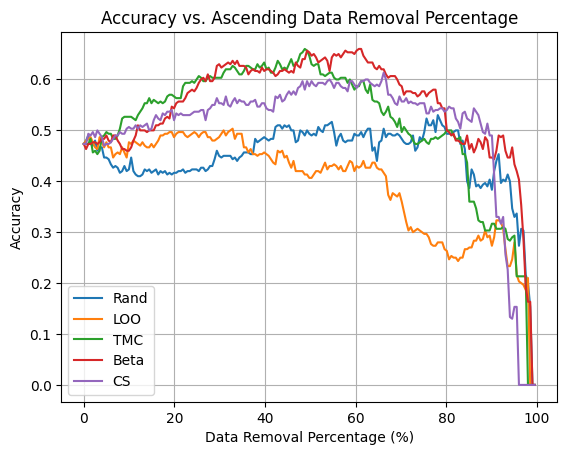

The weighted accuracy drop for Rand is 0.095
The weighted accuracy drop for LOO is 0.085
The weighted accuracy drop for TMC is -0.194
The weighted accuracy drop for Beta is -0.193
The weighted accuracy drop for CS is -0.161


In [62]:
acc_rand_asc, acc_loo_asc, acc_tmc_asc, acc_beta_asc, acc_cs_asc, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=False,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

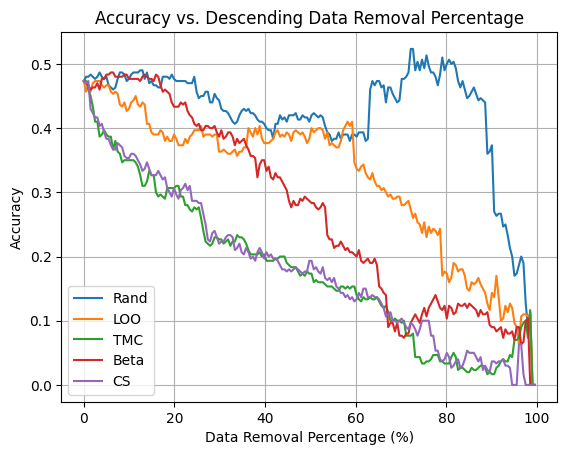

The weighted accuracy drop for Rand is 0.060
The weighted accuracy drop for LOO is 0.318
The weighted accuracy drop for TMC is 0.750
The weighted accuracy drop for Beta is 0.328
The weighted accuracy drop for CS is 0.733


In [63]:
acc_rand_des, acc_loo_des, acc_tmc_des, acc_beta_des, acc_cs_des, _ = shap_comparison(
    X_train_batch, y_train_batch, X_test, y_test,
    remove_high_value=True,
    vals_rand=vals_rand,
    vals_loo=vals_loo,
    vals_tmc=vals_tmc,
    vals_beta=vals_beta,
    vals_cs=vals_cs)

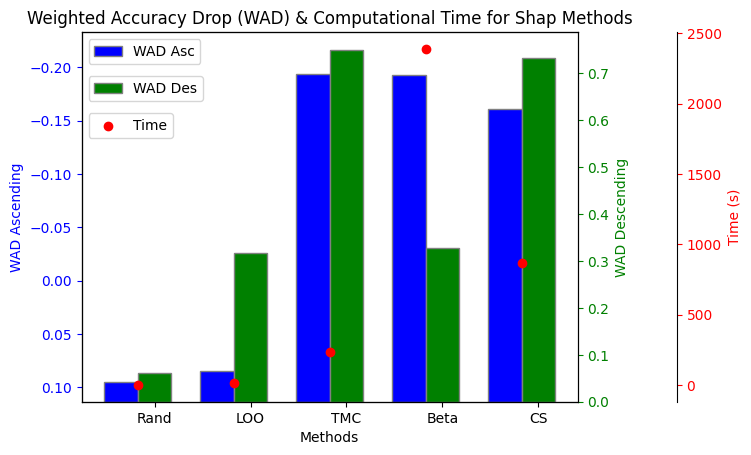

In [68]:
methods = ['Rand', 'LOO', 'TMC', 'Beta', 'CS']
acc_values_asc = [acc_rand_asc, acc_loo_asc, acc_tmc_asc, acc_beta_asc, acc_cs_asc]
acc_values_des = [acc_rand_des, acc_loo_des, acc_tmc_des, acc_beta_des, acc_cs_des]
time_values = [time_rand, time_loo, time_tmc, time_beta, time_cs]

barWidth = 0.35
r1 = np.arange(len(acc_values_asc))
r2 = [x + barWidth for x in r1]
r_time = [x + barWidth/2 for x in r1]

fig, ax1 = plt.subplots()

ax1.set_ylim([max(acc_values_asc) * 1.2, min(acc_values_asc) * 1.2])
height = acc_values_asc - max(acc_values_asc) * 1.2
bottom = max(acc_values_asc) * 1.2
bars1 = ax1.bar(r1, height=height, bottom=bottom, color='b', width=barWidth, edgecolor='grey', label='WAD Asc')
ax1.set_xlabel('Methods')
ax1.set_xticks([r + barWidth for r in range(len(acc_values_asc))])
ax1.set_xticklabels(methods)
ax1.set_ylabel('WAD Ascending', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
bars2 = ax2.bar(r2, acc_values_des, color='g', width=barWidth, edgecolor='grey', label='WAD Des')
ax2.set_ylabel('WAD Descending', color='g')
ax2.tick_params('y', colors='g')

ax3 = ax1.twinx()
ax3.spines.right.set_position(("axes", 1.2))
ax3.scatter(r_time, time_values, color='r', marker='o', label='Time')
ax3.set_ylabel('Time (s)', color='r')
ax3.tick_params('y', colors='r')

ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
ax3.legend(loc='upper left', bbox_to_anchor=(0, 0.8))

plt.title('Weighted Accuracy Drop (WAD) & Computational Time for Shap Methods')
plt.show()